In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
BASE_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Final Project'
print(os.listdir(BASE_FILE_PATH))

['Keys', 'Setting up connection with Git-Hub.ipynb', 'entries.csv', 'summoner_details.csv', 'updated_dataset.csv', 'filtered_dataset.csv', 'filtered_dataset.gsheet', 'filtered_+30_matches_dataset.csv', 'EDA.ipynb', 'merged_dataset.csv', 'merged_dataset.gsheet', 'Merging match with entries and classifying accounts.ipynb']


In [65]:
df = pd.read_csv(os.path.join(BASE_FILE_PATH, 'merged_dataset.csv'))
df.head()

,match_id,game_creation,game_duration,game_mode,game_version,map_id,summoner_id,puuid,champion_id,kills,...,team_position,win,game_duration_min,game_creation_dt,time_segment,tier,rank,days_since_last_game,time_group,binary_time_group
0,NA1_4967002924,1712434308642,1087,CLASSIC,14.7.571.9528,11,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,17,3,...,UTILITY,True,18.116667,2024-04-06 20:11:48.642,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
1,NA1_5050183543,1721508545865,1282,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,30,14,...,All Mid,True,21.366667,2024-07-20 20:49:05.865,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
2,NA1_5050376845,1721513174857,1327,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,161,12,...,All Mid,False,22.116667,2024-07-20 22:06:14.857,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
3,NA1_5052219350,1721575116568,1344,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,15,6,...,All Mid,False,22.400000,2024-07-21 15:18:36.568,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
4,NA1_5052262521,1721577348686,1261,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,238,11,...,All Mid,True,21.016667,2024-07-21 15:55:48.686,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   match_id              128021 non-null  object 
 1   game_creation         128021 non-null  int64  
 2   game_duration         128021 non-null  int64  
 3   game_mode             128021 non-null  object 
 4   game_version          128021 non-null  object 
 5   map_id                128021 non-null  int64  
 6   summoner_id           128021 non-null  object 
 7   puuid                 128021 non-null  object 
 8   champion_id           128021 non-null  int64  
 9   kills                 128021 non-null  int64  
 10  deaths                128021 non-null  int64  
 11  assists               128021 non-null  int64  
 12  total_damage_dealt    128021 non-null  int64  
 13  total_damage_taken    128021 non-null  int64  
 14  gold_earned           128021 non-null  int64  
 15  

In [67]:
columns_to_drop = ['match_id', 'puuid', 'game_version']
df.drop(columns=columns_to_drop, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_creation         128021 non-null  int64  
 1   game_duration         128021 non-null  int64  
 2   game_mode             128021 non-null  object 
 3   map_id                128021 non-null  int64  
 4   summoner_id           128021 non-null  object 
 5   champion_id           128021 non-null  int64  
 6   kills                 128021 non-null  int64  
 7   deaths                128021 non-null  int64  
 8   assists               128021 non-null  int64  
 9   total_damage_dealt    128021 non-null  int64  
 10  total_damage_taken    128021 non-null  int64  
 11  gold_earned           128021 non-null  int64  
 12  vision_score          128021 non-null  int64  
 13  total_minions_killed  128021 non-null  int64  
 14  team_position         128021 non-null  object 
 15  

In [69]:
missing_data = df.isnull().sum()

# Display columns with missing values and their count of missing data
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [70]:
categorical_columns = ['game_mode', 'team_position', 'tier', 'rank']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_creation          128021 non-null  int64  
 1   game_duration          128021 non-null  int64  
 2   map_id                 128021 non-null  int64  
 3   summoner_id            128021 non-null  object 
 4   champion_id            128021 non-null  int64  
 5   kills                  128021 non-null  int64  
 6   deaths                 128021 non-null  int64  
 7   assists                128021 non-null  int64  
 8   total_damage_dealt     128021 non-null  int64  
 9   total_damage_taken     128021 non-null  int64  
 10  gold_earned            128021 non-null  int64  
 11  vision_score           128021 non-null  int64  
 12  total_minions_killed   128021 non-null  int64  
 13  win                    128021 non-null  bool   
 14  game_duration_min      128021 non-nu

In [72]:
features_to_normalize = [
    'kills', 'deaths', 'assists', 'gold_earned', 'game_duration',
    'total_damage_dealt', 'total_damage_taken', 'total_minions_killed'
]

# List of all game mode columns
game_mode_columns = [col for col in df.columns if 'game_mode_' in col]

# Loop through each game mode and each feature
for mode_col in game_mode_columns:
    mode_mask = df[mode_col] == 1  # Mask for rows where this game mode is active

    for feature in features_to_normalize:
        # Calculate the mean and standard deviation for the feature within this game mode
        mean_feature = df.loc[mode_mask, feature].mean()
        std_feature = df.loc[mode_mask, feature].std()

        # Normalize feature within this specific game mode
        # Create a new column for the normalized feature
        normalized_col_name = f'{feature}_normalized_{mode_col}'

        if std_feature > 0:
            df.loc[mode_mask, normalized_col_name] = (df.loc[mode_mask, feature] - mean_feature) / std_feature
        else:
            df.loc[mode_mask, normalized_col_name] = 0  # Handling cases where std is zero

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   game_creation                                      128021 non-null  int64  
 1   game_duration                                      128021 non-null  int64  
 2   map_id                                             128021 non-null  int64  
 3   summoner_id                                        128021 non-null  object 
 4   champion_id                                        128021 non-null  int64  
 5   kills                                              128021 non-null  int64  
 6   deaths                                             128021 non-null  int64  
 7   assists                                            128021 non-null  int64  
 8   total_damage_dealt                                 128021 non-null  int64 

In [74]:
df.head()

,game_creation,game_duration,map_id,summoner_id,champion_id,kills,deaths,assists,total_damage_dealt,total_damage_taken,...,total_damage_taken_normalized_game_mode_CHERRY,total_minions_killed_normalized_game_mode_CHERRY,kills_normalized_game_mode_CLASSIC,deaths_normalized_game_mode_CLASSIC,assists_normalized_game_mode_CLASSIC,gold_earned_normalized_game_mode_CLASSIC,game_duration_normalized_game_mode_CLASSIC,total_damage_dealt_normalized_game_mode_CLASSIC,total_damage_taken_normalized_game_mode_CLASSIC,total_minions_killed_normalized_game_mode_CLASSIC
0,1712434308642,1087,11,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,17,3,1,5,21894,6011,...,NaN,NaN,-0.678143,-1.383065,-0.420676,-1.258576,-1.226508,-1.324091,-1.407523,-1.025496
1,1721508545865,1282,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,30,14,19,26,138247,41918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1721513174857,1327,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,161,12,13,29,110883,33804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1721575116568,1344,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,15,6,20,31,135813,42284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1721577348686,1261,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,238,11,16,18,62148,30458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
normalized_columns = [col for col in df.columns if 'normalized' in col]
df[normalized_columns] = df[normalized_columns].fillna(0)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   game_creation                                      128021 non-null  int64  
 1   game_duration                                      128021 non-null  int64  
 2   map_id                                             128021 non-null  int64  
 3   summoner_id                                        128021 non-null  object 
 4   champion_id                                        128021 non-null  int64  
 5   kills                                              128021 non-null  int64  
 6   deaths                                             128021 non-null  int64  
 7   assists                                            128021 non-null  int64  
 8   total_damage_dealt                                 128021 non-null  int64 

In [77]:
# Select normalized columns
normalized_columns = [col for col in df.columns if 'normalized' in col]

# Calculate statistical summaries for the normalized features
statistical_summary = df[normalized_columns].describe().transpose()

# Display the summary statistics
print(statistical_summary)

                                                      count          mean  \
kills_normalized_game_mode_ARAM                    128021.0  2.858355e-18   
deaths_normalized_game_mode_ARAM                   128021.0  2.358837e-17   
assists_normalized_game_mode_ARAM                  128021.0  3.163617e-18   
gold_earned_normalized_game_mode_ARAM              128021.0 -4.995184e-18   
game_duration_normalized_game_mode_ARAM            128021.0 -3.008211e-17   
total_damage_dealt_normalized_game_mode_ARAM       128021.0 -1.809367e-17   
total_damage_taken_normalized_game_mode_ARAM       128021.0  1.351475e-17   
total_minions_killed_normalized_game_mode_ARAM     128021.0 -1.454154e-17   
kills_normalized_game_mode_CHERRY                  128021.0 -3.399500e-18   
deaths_normalized_game_mode_CHERRY                 128021.0  3.385625e-18   
assists_normalized_game_mode_CHERRY                128021.0 -4.245906e-18   
gold_earned_normalized_game_mode_CHERRY            128021.0 -5.938719e-18   

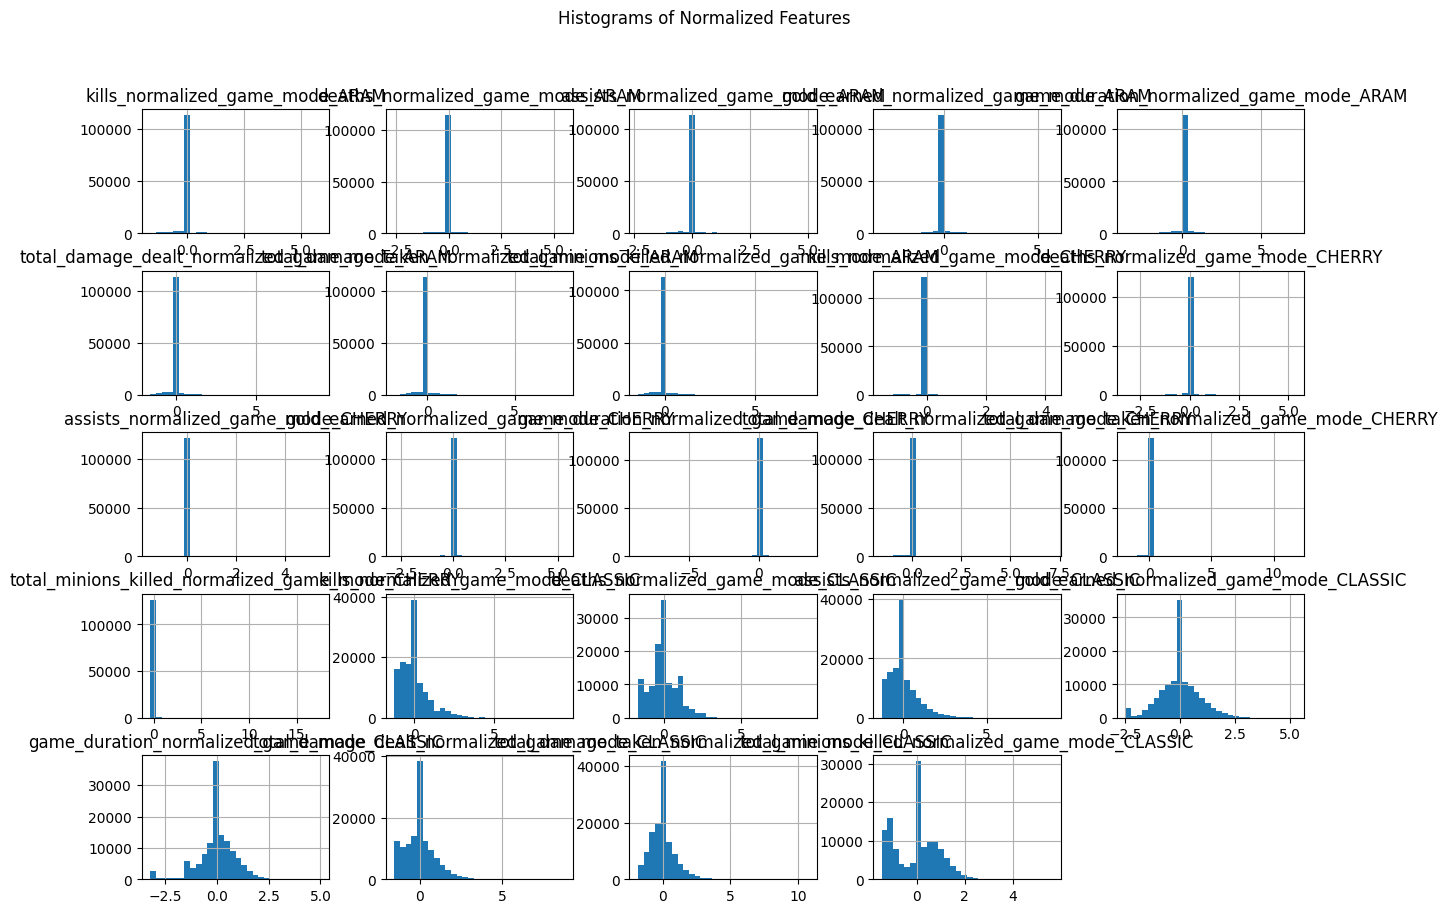

In [78]:
# Plot histograms for a subset of normalized features
df[normalized_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Normalized Features')
plt.show()

In [79]:
from scipy.stats.mstats import winsorize

# Selecting the features to apply winsorization
features_to_winsorize = ['kills_normalized_game_mode_CHERRY', 'deaths_normalized_game_mode_CHERRY',
                         'assists_normalized_game_mode_CHERRY', 'gold_earned_normalized_game_mode_CHERRY',
                         'game_duration_normalized_game_mode_CHERRY', 'total_damage_dealt_normalized_game_mode_CHERRY',
                         'total_damage_taken_normalized_game_mode_CHERRY', 'total_minions_killed_normalized_game_mode_CHERRY']

# Applying winsorization to each feature
for feature in features_to_winsorize:
    df[feature + '_winsorized'] = winsorize(df[feature], limits=[0.01, 0.01])

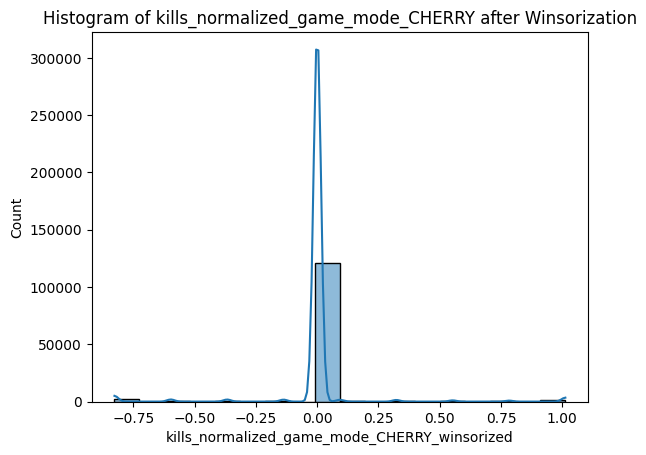

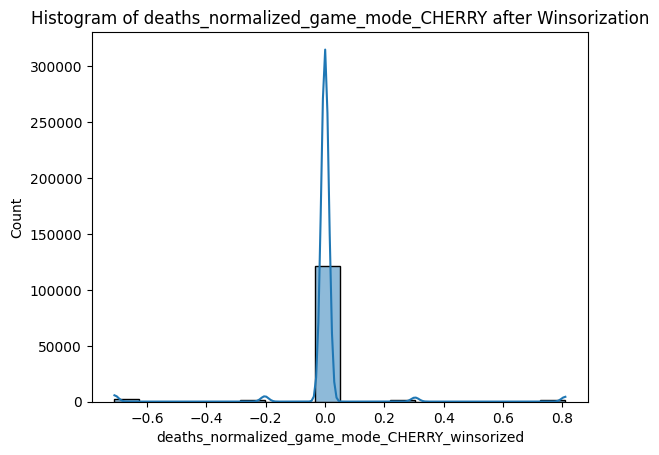

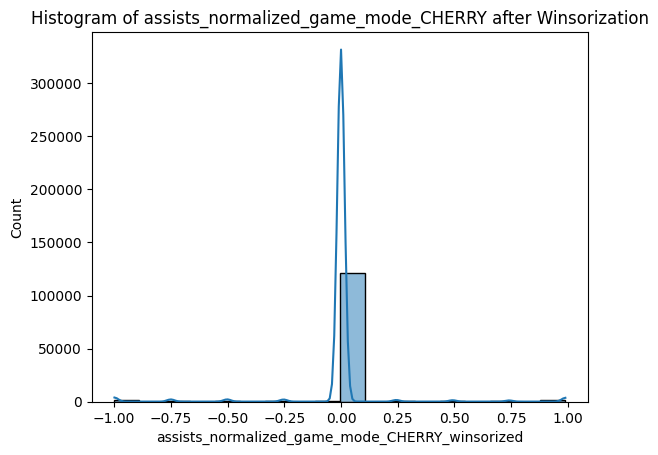

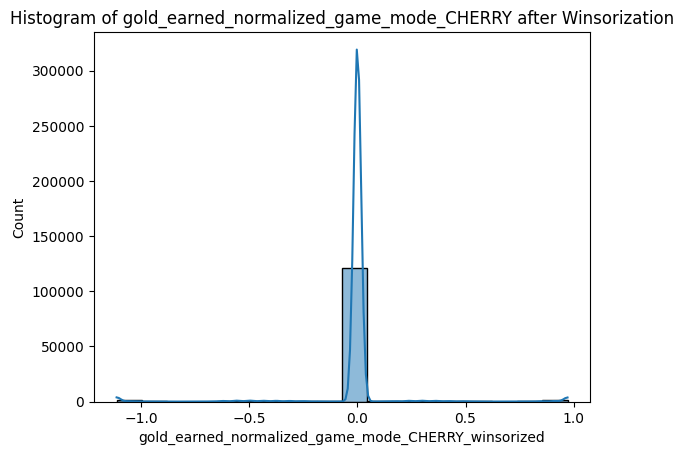

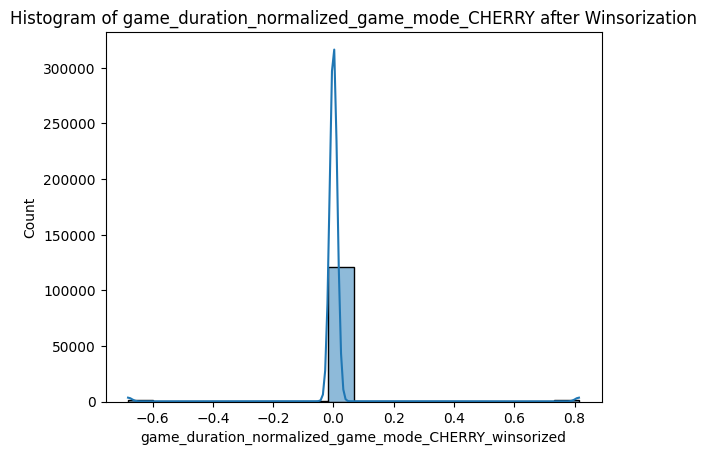

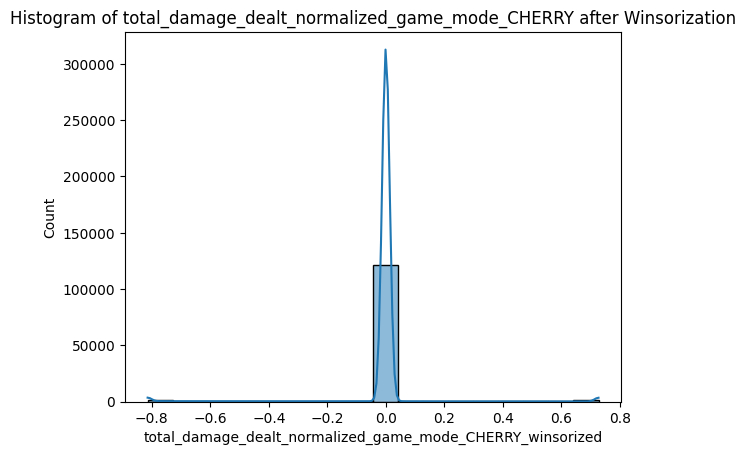

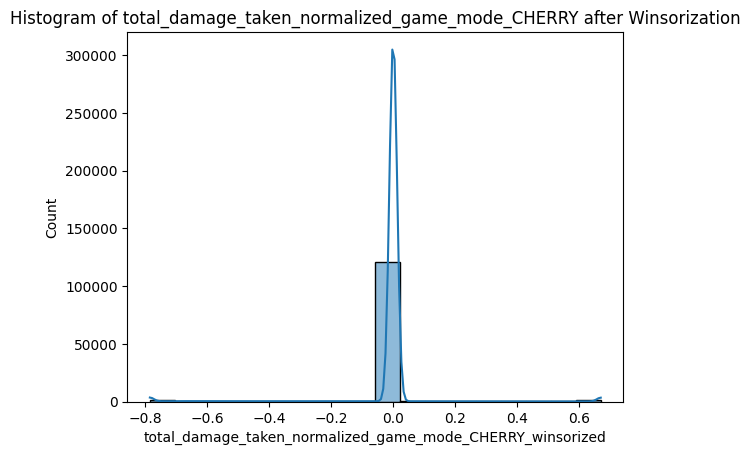

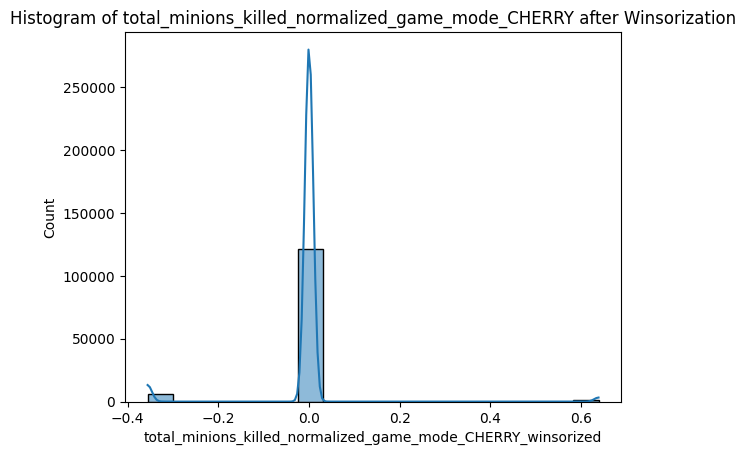

In [80]:
# Histograms of winsorized features
for feature in features_to_winsorize:
    sns.histplot(df[feature + '_winsorized'], kde=True)
    plt.title(f'Histogram of {feature} after Winsorization')
    plt.show()

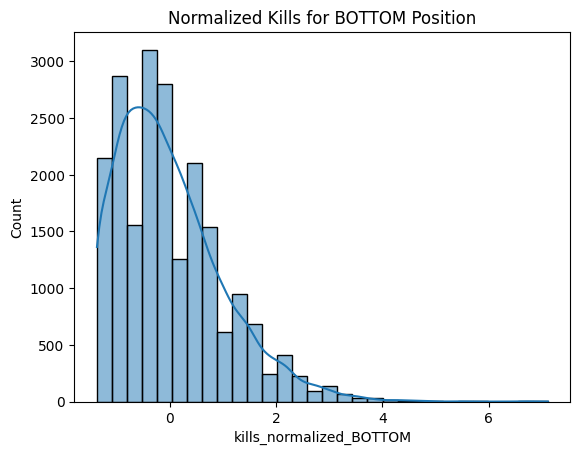

In [81]:
# Filter the dataframe for CLASSIC game mode
df_classic = df[df['game_mode_CLASSIC'] == 1].copy()

# List of features to normalize
features_to_normalize = ['kills', 'assists', 'deaths', 'gold_earned', 'total_damage_dealt', 'total_damage_taken','total_minions_killed' ]

# DataFrame to store normalized features
df_normalized = pd.DataFrame()

# Normalize features by team position
for position in ['BOTTOM', 'JUNGLE', 'MIDDLE', 'TOP', 'UTILITY']:
    for feature in features_to_normalize:
        # Column names for the normalized features
        norm_col_name = f'{feature}_normalized_{position}'

        # Select data for the current position
        mask = df_classic[f'team_position_{position}'] == 1
        position_data = df_classic[mask]

        # Calculate mean and standard deviation
        mean_val = position_data[feature].mean()
        std_val = position_data[feature].std()

        # Normalize the data
        if std_val > 0:
            df_classic.loc[mask, norm_col_name] = (position_data[feature] - mean_val) / std_val
        else:
            df_classic.loc[mask, norm_col_name] = 0  # If std is zero, avoid division by zero

# Visualize the results for 'kills' as an example
sns.histplot(df_classic['kills_normalized_BOTTOM'].dropna(), bins=30, kde=True)
plt.title('Normalized Kills for BOTTOM Position')
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 68 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   game_creation                                                128021 non-null  int64  
 1   game_duration                                                128021 non-null  int64  
 2   map_id                                                       128021 non-null  int64  
 3   summoner_id                                                  128021 non-null  object 
 4   champion_id                                                  128021 non-null  int64  
 5   kills                                                        128021 non-null  int64  
 6   deaths                                                       128021 non-null  int64  
 7   assists                                                      1280

In [87]:
df_classic.columns
for col in df_classic.columns:
  print(col)

game_creation
game_duration
map_id
summoner_id
champion_id
kills
deaths
assists
total_damage_dealt
total_damage_taken
gold_earned
vision_score
total_minions_killed
win
game_duration_min
game_creation_dt
time_segment
days_since_last_game
time_group
binary_time_group
game_mode_ARAM
game_mode_CHERRY
game_mode_CLASSIC
team_position_All Mid
team_position_BOTTOM
team_position_Duo
team_position_JUNGLE
team_position_MIDDLE
team_position_TOP
team_position_UTILITY
team_position_Unknown
tier_GOLD
rank_I
rank_II
rank_III
rank_IV
kills_normalized_game_mode_ARAM
deaths_normalized_game_mode_ARAM
assists_normalized_game_mode_ARAM
gold_earned_normalized_game_mode_ARAM
game_duration_normalized_game_mode_ARAM
total_damage_dealt_normalized_game_mode_ARAM
total_damage_taken_normalized_game_mode_ARAM
total_minions_killed_normalized_game_mode_ARAM
kills_normalized_game_mode_CHERRY
deaths_normalized_game_mode_CHERRY
assists_normalized_game_mode_CHERRY
gold_earned_normalized_game_mode_CHERRY
game_duration_norm

In [88]:
columns_to_drop = [
    'champion_id', 'map_id', 'vision_score',
    'kills_normalized_game_mode_CHERRY',
    'deaths_normalized_game_mode_CHERRY',
    'assists_normalized_game_mode_CHERRY',
    'gold_earned_normalized_game_mode_CHERRY',
    'game_duration_normalized_game_mode_CHERRY',
    'total_damage_dealt_normalized_game_mode_CHERRY',
    'total_damage_taken_normalized_game_mode_CHERRY',
    'total_minions_killed_normalized_game_mode_CHERRY'
]

df_classic.drop(columns=columns_to_drop, inplace=True)

In [89]:
df_classic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103943 entries, 0 to 128020
Data columns (total 92 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   game_creation                                                103943 non-null  int64  
 1   game_duration                                                103943 non-null  int64  
 2   summoner_id                                                  103943 non-null  object 
 3   kills                                                        103943 non-null  int64  
 4   deaths                                                       103943 non-null  int64  
 5   assists                                                      103943 non-null  int64  
 6   total_damage_dealt                                           103943 non-null  int64  
 7   total_damage_taken                                           103943 no

In [90]:
normalized_columns = [
    'kills_normalized_BOTTOM', 'assists_normalized_BOTTOM', 'deaths_normalized_BOTTOM',
    'gold_earned_normalized_BOTTOM', 'total_damage_dealt_normalized_BOTTOM', 'total_damage_taken_normalized_BOTTOM', 'total_minions_killed_normalized_BOTTOM',
    'kills_normalized_JUNGLE', 'assists_normalized_JUNGLE', 'deaths_normalized_JUNGLE',
    'gold_earned_normalized_JUNGLE', 'total_damage_dealt_normalized_JUNGLE', 'total_damage_taken_normalized_JUNGLE', 'total_minions_killed_normalized_JUNGLE',
    'kills_normalized_MIDDLE', 'assists_normalized_MIDDLE', 'deaths_normalized_MIDDLE',
    'gold_earned_normalized_MIDDLE', 'total_damage_dealt_normalized_MIDDLE', 'total_damage_taken_normalized_MIDDLE', 'total_minions_killed_normalized_MIDDLE',
    'kills_normalized_TOP', 'assists_normalized_TOP', 'deaths_normalized_TOP',
    'gold_earned_normalized_TOP', 'total_damage_dealt_normalized_TOP', 'total_damage_taken_normalized_TOP', 'total_minions_killed_normalized_TOP',
    'kills_normalized_UTILITY', 'assists_normalized_UTILITY', 'deaths_normalized_UTILITY',
    'gold_earned_normalized_UTILITY', 'total_damage_dealt_normalized_UTILITY', 'total_damage_taken_normalized_UTILITY', 'total_minions_killed_normalized_UTILITY'
]

# Fill NaN values with 0 in specified columns
df_classic[normalized_columns] = df_classic[normalized_columns].fillna(0)

In [91]:
df_classic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103943 entries, 0 to 128020
Data columns (total 92 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   game_creation                                                103943 non-null  int64  
 1   game_duration                                                103943 non-null  int64  
 2   summoner_id                                                  103943 non-null  object 
 3   kills                                                        103943 non-null  int64  
 4   deaths                                                       103943 non-null  int64  
 5   assists                                                      103943 non-null  int64  
 6   total_damage_dealt                                           103943 non-null  int64  
 7   total_damage_taken                                           103943 no